## dMelodies: A Music Dataset for Disentanglement Learning
### Description
The dMelodies dataset is a dataset of algorithmically generated monophonic melodies. Each datapoint is a 2-bar melody which plays arpreggios on the standard I-IV-V-I cadence chord pattern. The dataset has 9 independent latent factors of variation: root, octave, scale, rhythm bar 1, rhythm bar 2, arpeggiation direction for each of the 4 chords.

This jupyter notebook provides examples on how to use the dMelodies dataset and the provided pyTorch dataloader. 

### Loading Data
**Option 1**: The dataset can also be read using the .npz object.

In [3]:
import numpy as np

In [4]:
# Load dataset
dataset_npz = np.load('data/dMelodies_dataset.npz', allow_pickle=True)

print('Keys in the dataset:', dataset_npz.files)
score_array = dataset_npz['score_array'] # numpy array containing the score representation (num_datapoint x 16)
latent_array = dataset_npz['latent_array']  # numpy array containing the latent values of each datapoint (num_datapoint x 9)
print(f'Score Array Shape: {score_array.shape}, Latent Array Shape: {latent_array.shape}' )

metadata = dataset_npz['metadata']
print(f'Metadata: \n {metadata}')

Keys in the dataset: ['score_array', 'latent_array', 'note2index_dict', 'index2note_dict', 'latent_dicts', 'metadata']
Score Array Shape: (1354752, 16), Latent Array Shape: (1354752, 9)
Metadata: 
 {'title': 'dMelodies dataset', 'description': 'dMelodies dataset. Algorithmically generated 2-bar melodies. Each datapoint is a 2-bar melody which plays arpreggios on the standard I-IV-V-I cadence chord pattern. The dataset has 9 independent latent factors of variation: root, octave, scale, rhythm bar 1, rhythm bar 2, arpeggiation direction for each of the 4 chords. All possible values of the latent factors are present.', 'version': 1, 'authors': 'ashis.pati@gatech.edu, siddharth.gururani@gatech.edu, alexander.lerch@gatech.edu', 'data': 'July 26, 2020', 'latents_names': ('tonic', 'octave', 'scale', 'rhythm_bar1', 'rhythm_bar2', 'arp_chord1', 'arp_chord2', 'arp_chord3', 'arp_chord4')}


**Option 2**: Alternatively, the dataset can also be accesses using the `DMelodiesDataset` class.

In [5]:
from dmelodies_dataset import DMelodiesDataset

# Load dataset
dataset = DMelodiesDataset()
dataset.make_or_load_dataset()  # loads the dataset

score_array = dataset.score_array  # numpy array containing the score representation (num_datapoint x 16)
latent_array = dataset.latent_array  # numpy array containing the latent values of each datapoint (num_datapoint x 9)
print(f'Score Array Shape: {score_array.shape}, Latent Array Shape: {latent_array.shape}' )

metadata = dataset.metadata
print(f'Metadata: \n {metadata}')


/Users/som/miniconda3/envs/inpaint/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Dataset already created. Reading it now
Score Array Shape: (1354752, 16), Latent Array Shape: (1354752, 9)
Metadata: 
 {'title': 'dMelodies dataset', 'description': 'dMelodies dataset. Algorithmically generated 2-bar melodies. Each datapoint is a 2-bar melody which plays arpreggios on the standard I-IV-V-I cadence chord pattern. The dataset has 9 independent latent factors of variation: root, octave, scale, rhythm bar 1, rhythm bar 2, arpeggiation direction for each of the 4 chords. All possible values of the latent factors are present.', 'version': 1, 'authors': 'ashis.pati@gatech.edu, siddharth.gururani@gatech.edu, alexander.lerch@gatech.edu', 'data': 'July 26, 2020', 'latents_names': ('tonic', 'octave', 'scale', 'rhythm_bar1', 'rhythm_bar2', 'arp_chord1', 'arp_chord2', 'arp_chord3', 'arp_chord4')}


Visualizing Example Melodies

In [6]:
import random
import music21

{'tonic': 'F#', 'octave': 5, 'scale': 'blues', 'rhythm_bar1': [1, 1, 0, 0, 1, 1, 1, 1], 'rhythm_bar2': [1, 1, 1, 1, 0, 1, 1, 0], 'arp_chord1': 'up', 'arp_chord2': 'down', 'arp_chord3': 'down', 'arp_chord4': 'down'}


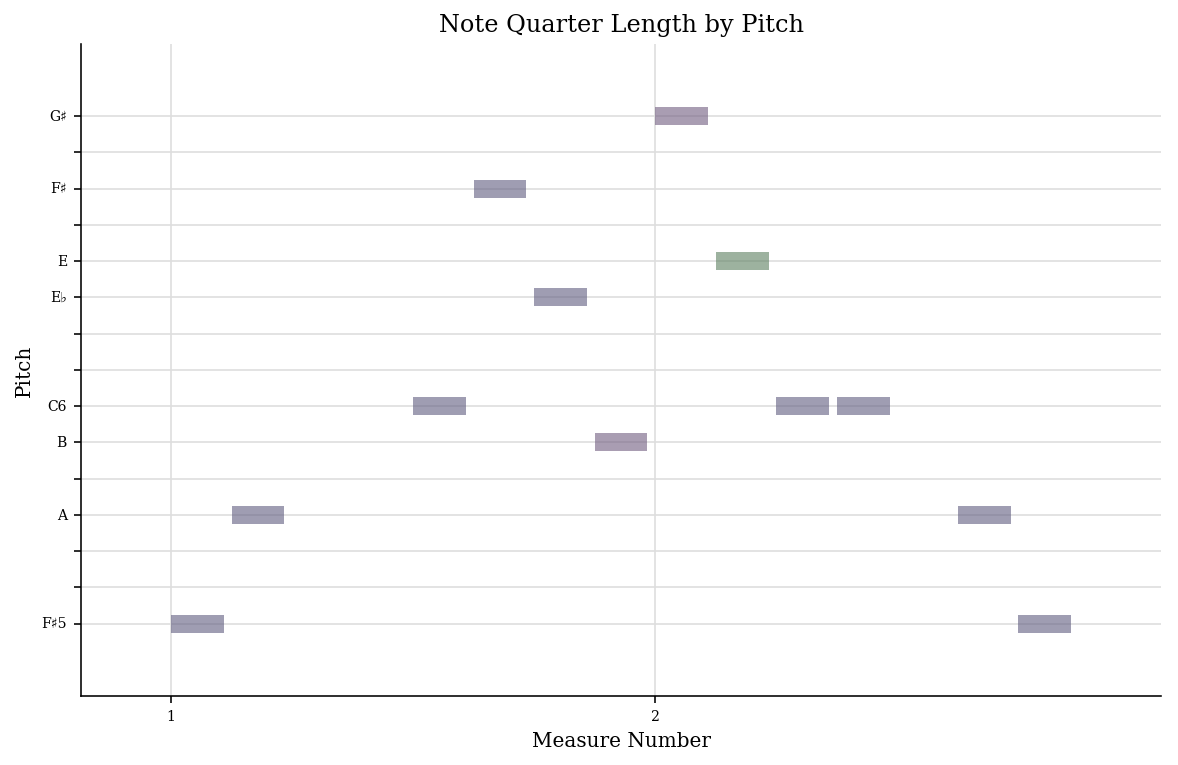

In [7]:
rand_idx = random.randint(0, dataset.num_data_points)
melody = dataset.get_score_from_datapoint(rand_idx)
melody.parts[0].measures(1,2).plot()  # show as piano roll
latents = dataset.get_latent_values_for_index(rand_idx)
print(latents)
# alternatively, if Musescore is correctly configured to be used with music21, then the score can also be displayed
# melody.show()

### Using the PyTorch Dataloader

A pyTorch dataloader class is provided in this repository in the `dmelodies_torch_dataloader.py` file.   

In [8]:
from dmelodies_torch_dataloader import DMelodiesTorchDataset

# Instantiate dataloader and load dataset
torch_dataloader = DMelodiesTorchDataset(seed=0)  # seed can be used to initialize different random seeds
torch_dataloader.load_dataset()  
print(f'Total number of datapoints: {len(torch_dataloader.dataset)}')

# Create dataloaders
train_dl, val_dl, eval_dl = torch_dataloader.data_loaders(batch_size=32, split=(0.6, 0.3))
print(f'Number of batches: \n \t train:{len(train_dl)} \n \t validation:{len(val_dl)} \n \t test:{len(eval_dl)}')

/Users/som/miniconda3/envs/inpaint/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Dataset already created. Reading it now
Total number of datapoints: 1354752
Number of batches: 
 	 train:25402 
 	 validation:12701 
 	 test:4234
